In [64]:
#Importando librerías
import numpy as np
from scipy import interpolate
import matplotlib . pyplot as plt
from numpy.polynomial.polynomial import Polynomial as poly

In [ ]:
#definiendo la función original 1.a
def funcion_a(x: float):
    return pow(0.3, abs(x)) * np.sin(4*x) - np.tanh(2*x) + 2

dominio_a, dx = np.linspace(-4, 4, 1000, retstep=True)
imagen_a = funcion_a(dominio_a)

In [ ]:
#definiendo los valores de muestra
def nueva_muestra(n: int):
    n_valores_x, dnx = np.linspace(-4, 4, n, retstep=True)
    n_valores_y = funcion_a(n_valores_x)
    return n_valores_x, n_valores_y, dnx

datos_x_a, datos_y_a, delta_x_a = nueva_muestra(5)

In [96]:
# Calcular los factores de Lagrange
def Lagrange_Poly(tabla_x, tabla_y, factores=False)-> poly:
    ''' Devuelve el polinomio interpolador de Lagrange, 
        utilice el flag factores=True para recibir (polinomio, lista_de_polinomios)'''

    n = len(tabla_x)
    x_incognita = poly(np.array([0,1]))
    factores_L_k = []
    sumatoria=0

    for k in range(n):
        producto = tabla_y[k]
        for i in range(n):
            if k != i:
                producto = producto * (x_incognita - tabla_x[i])/(tabla_x[k]-tabla_x[i])
        factores_L_k.append(producto)
        sumatoria = sumatoria + producto
    if factores==True:
        return sumatoria, factores_L_k
    else:
        return sumatoria

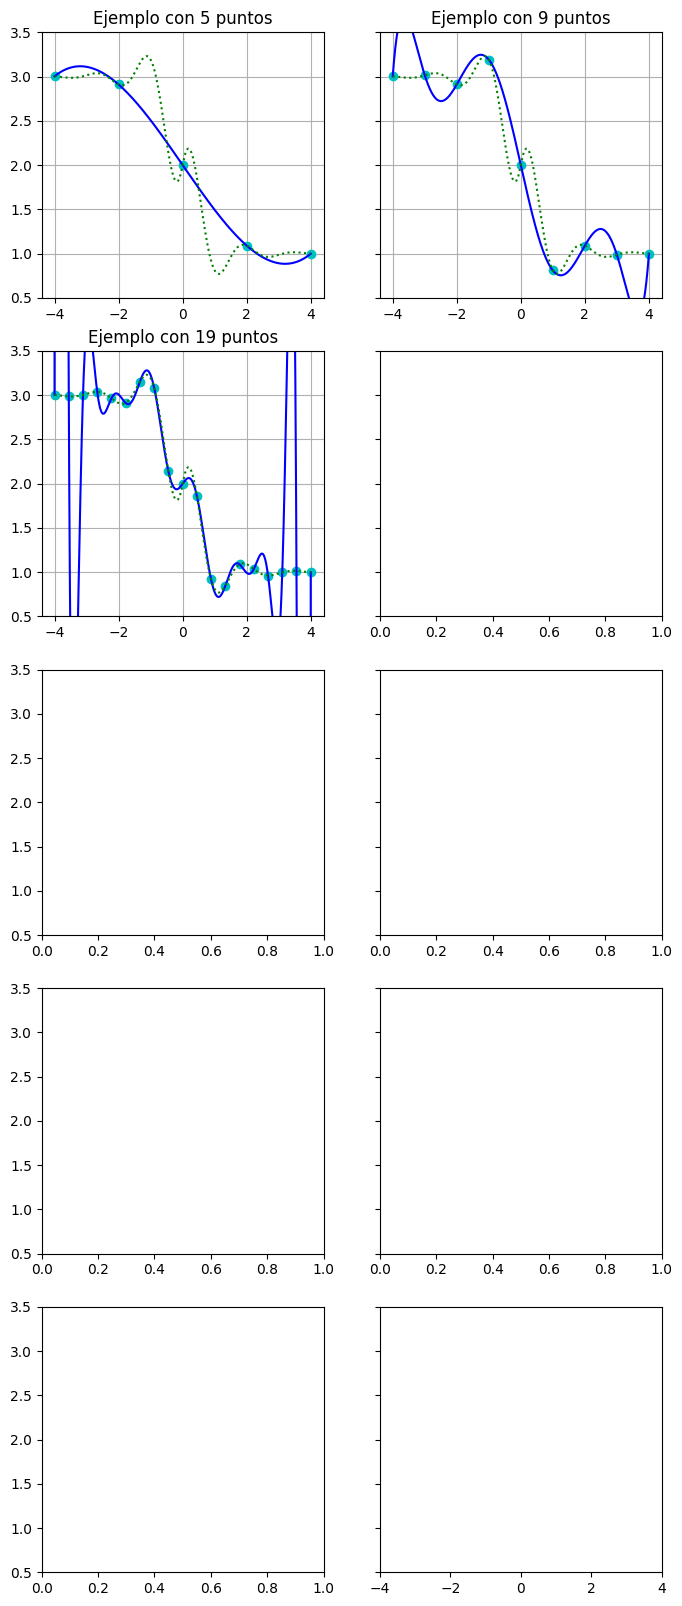

In [156]:
#Warning: experimental
fig, axes = plt.subplots(5,2, figsize=(8,20), sharey=True)
#fig = plt.figure(figsize=(8,20))

for index, vals in enumerate((5,9,19)):
    muestra_x_i, muestra_y_i, dmxi = nueva_muestra(vals)
    poly_i = Lagrange_Poly(muestra_x_i, muestra_y_i)
    imagen_i = poly_i(dominio_a)
    axes[index//2, index%2].plot(muestra_x_i, muestra_y_i, 'co',label='f Muestra con {} puntos'.format(str(vals)))
    axes[index//2, index%2].plot(dominio_a, imagen_i, 'b-', label='interpolado {}'.format(str(vals)))
    axes[index//2, index%2].plot(dominio_a, imagen_a, 'g:', label='Original $f_a(x)$')
    axes[index//2, index%2].title.set_text('Ejemplo con ' + str(vals) + ' puntos')
    axes[index//2, index%2].grid(True)
    #axes[(vals-3)//2, vals%2].legend()
    #plt.plot(muestra_x_i, muestra_y_i, 'x',label='f Muestra con {} puntos'.format(str(vals)))
    #plt.plot(dominio_a, imagen_i, ':', label='Polinomio {}'.format(str(vals)))
plt.ylim(0.5,3.5)
plt.xlim(-4,4)
plt.show()

## Zona de prueba abajo a continuación

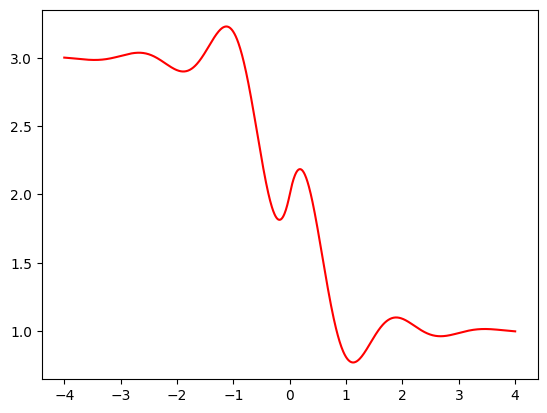

In [23]:
plt.plot(dominio_a, imagen_a, 'r-')

plt.show()

In [110]:
a = poly(np.array([1, 2]))
b = poly(np.array([5, 3]))
c= a*b
d= c(dominio_a)
print(str(c))

5.0 + 13.0·x + 6.0·x²


In [118]:
for h in range(7):
    print(h%2)

0
1
0
1
0
1
0
